Interp run-time performance results 

In [5]:
raw = """./TestAdderCount 1 12, 0:00.06, 5956
./TestAdderCount 5 12, 0:00.42, 7592
./TestAdderCount 10 12, 0:00.98, 8956
./TestAdderCount 20 12, 0:01.87, 10952
./TestAdderCount 50 12, 0:02.52, 12052
./TestAdderCount 100 12, 0:06.93, 15044
./TestAdderCount 1 13, 0:00.08, 6908
./TestAdderCount 5 13, 0:00.81, 7876
./TestAdderCount 10 13, 0:02.01, 9952
./TestAdderCount 20 13, 0:04.09, 13720
./TestAdderCount 50 13, 0:05.46, 26376
./TestAdderCount 100 13, 0:09.65, 18096
./TestAdderCount 1 15, 0:00.23, 10208
./TestAdderCount 5 15, 0:03.24, 15084
./TestAdderCount 10 15, 0:07.79, 18100
./TestAdderCount 20 15, 0:16.82, 23924
./TestAdderCount 50 15, 0:51.40, 75660
./TestAdderCount 100 15, 0:44.12, 92928
./TestAdderCount 1 16, 0:00.43, 15032
./TestAdderCount 5 16, 0:05.96, 21956
./TestAdderCount 10 16, 0:14.13, 25404
./TestAdderCount 20 16, 0:32.95, 32128
./TestAdderCount 50 16, 1:49.91, 101088
./TestAdderCount 100 16, 3:19.95, 289524
./TestAdderCount 1 17, 0:00.62, 23260
./TestAdderCount 5 17, 0:10.13, 33228
./TestAdderCount 10 17, 0:29.90, 47556
./TestAdderCount 20 17, 1:04.31, 55052
./TestAdderCount 50 17, 3:35.56, 143028
./TestAdderCount 100 17, 10:19.40, 465664
./TestAdderCount 1 18, 0:00.84, 38596
./TestAdderCount 5 18, 0:18.49, 50072
./TestAdderCount 10 18, 0:58.95, 62140
./TestAdderCount 20 18, 2:04.42, 89824
./TestAdderCount 50 18, 6:52.83, 212684
./TestAdderCount 100 18, 22:57.13, 654068
./TestAdderCount 1 19, 0:01.30, 70324
./TestAdderCount 5 19, 0:27.42, 87868
./TestAdderCount 10 19, 1:51.06, 103796
./TestAdderCount 20 19, 4:12.86, 130836
./TestAdderCount 50 19, 13:07.04, 278260
./TestAdderCount 100 19, 44:02.54, 913128
./TestAdderCount 1 20, 0:02.02, 132812
./TestAdderCount 5 20, 0:41.58, 152400
./TestAdderCount 10 20, 3:11.10, 175856
./TestAdderCount 20 20, 8:39.85, 243400
./TestAdderCount 50 20, 24:46.75, 371444
./TestAdderCount 100 20, 1:18:32, 1190584
./TestAdderCount 1 21, 0:03.37, 257944
./TestAdderCount 5 21, 0:56.28, 274124
./TestAdderCount 10 21, 5:19.24, 323332
./TestAdderCount 20 21, 18:13.60, 391936
./TestAdderCount 50 21, 49:10.50, 618260
./TestAdderCount 100 21, 2:22:48, 1655492
./TestAdderCount 1 22, 0:04.40, 377544
./TestAdderCount 5 22, 1:23.43, 532284
./TestAdderCount 10 22, 7:15.68, 579328
./TestAdderCount 20 22, 32:37.55, 672648
./TestAdderCount 50 22, 1:35:07, 985984
./TestAdderCount 100 22, 4:07:29, 2097908
./TestAdderCount 1 23, 0:06.60, 939912
./TestAdderCount 5 23, 1:56.21, 1030856
./TestAdderCount 10 23, 10:37.43, 1102576
./TestAdderCount 20 23, 55:19.31, 1261260
./TestAdderCount 50 23, 3:20:03, 1851148
./TestAdderCount 100 23, 7:39:50, 3061516
./TestAdderCount 1 24, 0:11.10, 1699508
./TestAdderCount 5 24, 2:33.20, 2037564
./TestAdderCount 10 24, 13:27.65, 2094812
./TestAdderCount 20 24, 1:27:12, 2311940
./TestAdderCount 50 24, 6:50:53, 3207956
./TestAdderCount 100 24, 15:14:57, 4747960
./TestAdderCount 1 25, 0:17.17, 3095284
./TestAdderCount 5 25, 3:30.71, 4047748
./TestAdderCount 10 25, 17:27.91, 4097920
./TestAdderCount 20 25, 2:02:22, 4351748
./TestAdderCount 50 25, 14:01:49, 5314440
./TestAdderCount 100 25, 29:31:59, 7618360"""

lines = raw.split('\n')

In [6]:
from parse import *

In [7]:
import time
import pandas as pd

def parser(line):
    try:
        xs = parse('./TestAdderCount {} {}, {}:{}.{}, {}',line)
        return dict(n=int(xs[0]), b=int(xs[1]), time=(int(xs[2])*60+int(xs[3])+int(xs[4])/100)/100, mem=int(xs[5])/1024)
    except:
        pass
    xs = parse('./TestAdderCount {} {}, {}:{}:{}, {}',line)
    return dict(n=int(xs[0]), b=int(xs[1]), time=(int(xs[2])*60*60+int(xs[3])*60+int(xs[4]))/100, mem=int(xs[5])/1024)
                
df = pd.DataFrame([parser(line) for line in lines])

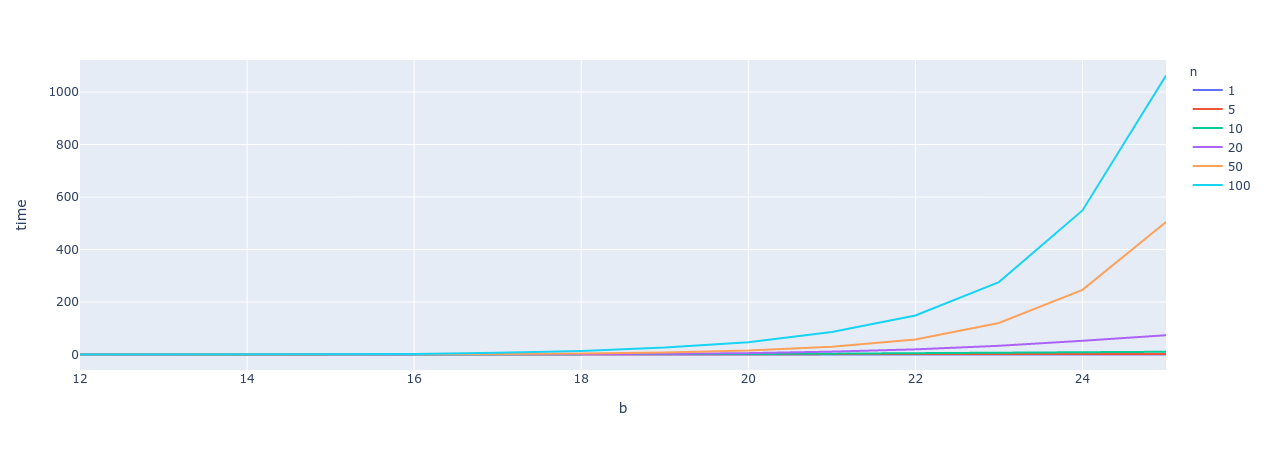

In [11]:
import plotly.express as px
px.line(df,x='b',y='time',color='n')

In [9]:
df

,n,b,time,mem
0,1,12,0.0006,5.816406
1,5,12,0.0042,7.414062
2,10,12,0.0098,8.746094
3,20,12,0.0187,10.695312
4,50,12,0.0252,11.769531
...,...,...,...,...
73,5,25,2.1071,3952.878906
74,10,25,10.4791,4001.875000
75,20,25,73.4200,4249.753906
76,50,25,505.0900,5189.882812
